#### Метод градиентного спуска для функций одной и двух переменных

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Начнем с реализации метода градиентного спуска для функции одной переменной

In [2]:
def f(x):
    return x ** 2 + 5 * x

In [3]:
def df_dx(x):
    return 2 * x + 5

In [4]:
x_current = 3 # начальное значение x 
learn_rate = 0.1 # скорость движения по функции
precision = 1e-7 # погрешность
max_iters = 100 # максимальное число итераций

In [5]:
res = []

In [6]:
# реализация градиентного спуска для функции 1 переменной
for i in range(max_iters):
    grad = df_dx(x_current)
    if abs(grad) <= precision:
        break
    x_next = x_current - learn_rate * grad
    x_current = x_next
    res.append((x_current, f(x_current)))

In [7]:
print("Минимум достигнут в точке:", x_current)

Минимум достигнут в точке: -2.499999950245587


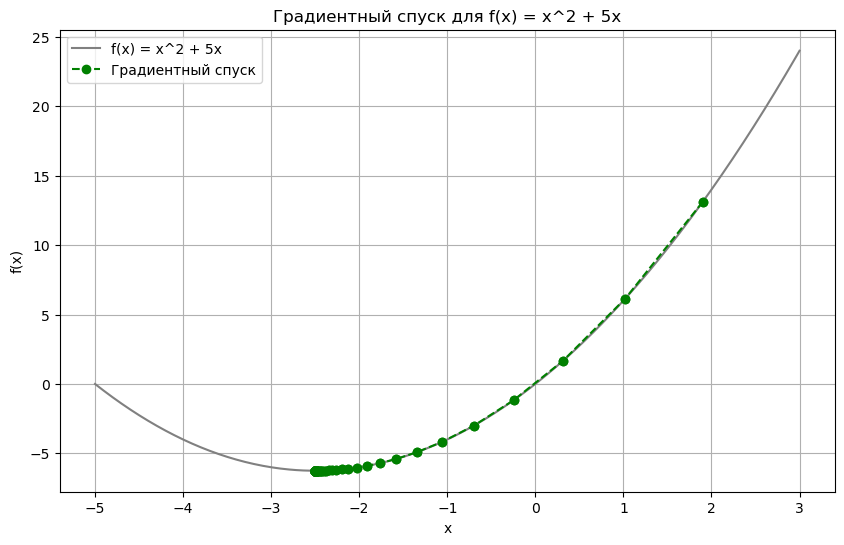

In [8]:
# визуализация
res_x, res_y = zip(*res)

x_vals_plot = np.linspace(-5, 3, 400)  
y_vals_plot = f(x_vals_plot) 

plt.figure(figsize=(10, 6))
plt.plot(x_vals_plot, y_vals_plot, label="f(x) = x^2 + 5x", color="gray")  
plt.plot(res_x, res_y, color="green", marker="o", linestyle="--", label="Градиентный спуск") # траектория градиентного спуска
plt.scatter(res_x, res_y, color="green") # точки на траектории
plt.title("Градиентный спуск для f(x) = x^2 + 5x")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

Теперь реализуем то же самое, но уже для функции двух переменных

In [9]:
def f(x):
    return x[0] ** 2 + x[1] ** 2

In [10]:
def df_dx(x):
    grad_x = 2 * x[0] 
    grad_y = 2 * x[1]
    return np.array([grad_x, grad_y])

In [11]:
start_point = np.array([2.0, 7.0]) # начальная точка
learn_rate = 0.1 # скорость движения по функции
precision = 1e-7 # погрешность
max_iters = 100 # максимальное число итераций
current_point = start_point.copy()

In [12]:
res = []

In [13]:
# реализация градиентного спуска для функции 2 переменных
for i in range(max_iters):
    grad = df_dx(current_point)
    next_point = current_point - learn_rate * grad
    if np.linalg.norm(next_point - current_point) <= precision:
        break
    current_point = next_point
    res.append(np.append(current_point, f(current_point))) 

In [14]:
print("Минимум достигнут в точке:", current_point)

Минимум достигнут в точке: [1.34799733e-07 4.71799067e-07]


In [15]:
# преобразование результатов в массивы для построения графика
res = np.array(res)
res_x, res_y, res_z = res[:, 0], res[:, 1], res[:, 2]

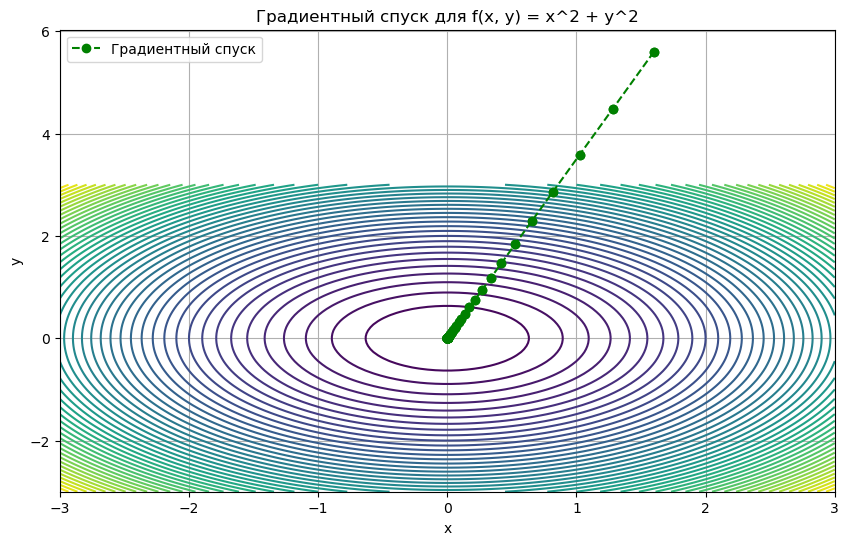

In [16]:
# визуализация
x_vals = np.linspace(-3, 3, 100)
y_vals = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f([X, Y])

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=50, cmap='viridis')  #контурный график функции
plt.plot(res_x, res_y, color="green", marker="o", linestyle="--", label="Градиентный спуск")  #траектория спуска
plt.scatter(res_x, res_y, color="green")  #точки на траектории
plt.title("Градиентный спуск для f(x, y) = x^2 + y^2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()